In [31]:
def zero_pad(arr,kernel_half):
    x,y=np.shape(arr)
    pad_h=np.zeros((arr.shape[0],kernel_half))
    arr=np.hstack((pad_h,arr))
    arr=np.hstack((arr,pad_h))
    pad_v=np.zeros((kernel_half,arr.shape[1]))
    arr=np.vstack((pad_v,arr))
    arr=np.vstack((arr,pad_v))
    return arr

In [32]:
import numpy as np
import cv2

imgL=cv2.imread('stereo_images/3L.jpg')
imgR=cv2.imread('stereo_images/3R.jpg')
imgL_gray=cv2.cvtColor(imgL,cv2.COLOR_BGR2GRAY)
imgR_gray=cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
#print(imgL_gray.shape,imgR_gray.shape)
points = cv2.goodFeaturesToTrack(imgL_gray,500,.1,15)
num_points=len(points)
points=np.reshape(points,(num_points,2))
#print(points)
points_x=points[:,1]
points_y=points[:,0]
arr  =imgL_gray
arr2 =imgR_gray
#print(arr.shape,arr2.shape)
x,y=np.shape(arr2)
matches=np.empty((num_points,4))
kernel=5
#diff=np.empty((3,3))
count=0
kernel_half=int(kernel/2)
arr=zero_pad(arr,kernel_half)
arr2=zero_pad(arr2,kernel_half)
print(arr.shape,arr2.shape)
for (u,v) in zip(points_x,points_y):
    temp=arr[int(u)-kernel_half:int(u)+kernel_half+1,int(v)-kernel_half:int(v)+kernel_half+1]
    temp=temp.flatten()
    ssd=[]
    idx_y=[]
    #print('next point')
    i=int(u)
    for j in range(kernel_half,y+kernel_half,1):
            win=arr2[i-kernel_half:i+kernel_half+1,j-kernel_half:j+kernel_half+1]
            win=win.flatten()
            #print(win.shape)
            diff=np.dot(temp,win)
            if np.linalg.norm(temp)!=0 and np.linalg.norm(win)!=0:
                diff=diff/np.linalg.norm(temp)
                diff=diff/np.linalg.norm(win)
            elif np.linalg.norm(temp)==0 and np.linalg.norm(win)!=0:
                diff=diff/0.00000001
                diff=diff/np.linalg.norm(win)
            elif np.linalg.norm(temp)!=0 and np.linalg.norm(win)==0:
                diff=diff/0.00000001
                diff=diff/np.linalg.norm(temp)
            elif np.linalg.norm(temp)==0 and np.linalg.norm(win)==0:
                diff=diff/0.00000001
                diff=diff/0.00000001
            ssd.append(diff)
            idx_y.append(j)
    index=np.argwhere(ssd==max(ssd))
    matches[count,0]=u
    matches[count,1]=v
    matches[count,2]=u
    matches[count,3]=idx_y[index[0][0]]
    count+=1
print(matches)

(162, 163) (162, 163)
[[150. 136. 150.   8.]
 [122. 102. 122. 100.]
 [ 39.  93.  39.  88.]
 [ 30.  71.  30.  68.]
 [ 88.  46.  88.  45.]
 [ 31.  54.  31.  54.]
 [110.  83. 110.  85.]
 [ 43.  45.  43.  34.]
 [ 62.  35.  62.  32.]
 [ 52. 105.  52.  61.]
 [101.  57. 101.  56.]
 [136.  43. 136. 131.]
 [ 45.  60.  45.  86.]
 [ 81. 103.  81.  62.]
 [ 94.  95.  94.  82.]
 [ 69.  83.  69.  79.]
 [ 68. 112.  68. 101.]
 [149.  67. 149.  71.]
 [156.  15. 156.   7.]
 [ 54.  77.  54.  72.]
 [154.  87. 154. 128.]
 [129.  20. 129.  79.]
 [ 96.  73.  96.  78.]
 [135.  60. 135.  66.]
 [ 63.  61.  63.  67.]
 [140.  81. 140.  86.]
 [ 73.  48.  73.  59.]
 [156. 104. 156. 108.]
 [ 83.  63.  83.  60.]
 [152. 151. 152.  65.]
 [129. 128. 129. 123.]
 [120.  43. 120.  54.]
 [150.  52. 150.  56.]
 [125.  82. 125.  19.]
 [132.   2. 132. 138.]
 [146. 116. 146. 127.]]


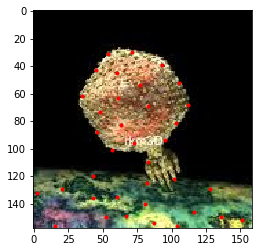

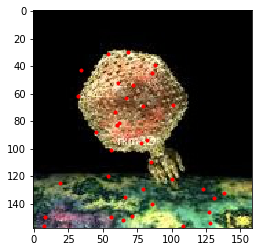

In [33]:
import matplotlib.pyplot as plt
img1 = plt.imread('stereo_images/3L.jpg')
plt.plot(matches[:,1],matches[:,0],'r.')  
plt.imshow(img1)
plt.savefig('stereo_rect3L.jpg')
plt.show()

img2 = plt.imread('stereo_images/3R.jpg')
plt.plot(matches[:,3],matches[:,2],'r.')  

plt.imshow(img2)
plt.savefig('stereo_rect3R.jpg')
plt.show()